In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df = pd.read_csv('../data/processed/data.csv')

In [189]:
df.shape

(7857, 8)

In [190]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first,hyderabad,35.0,19.0,63500.0
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first,hyderabad,35.0,19.8,115000.0
2,Hyosung GT250R 2012,2012,14795.0,first,hyderabad,30.0,28.0,300000.0
3,Bajaj Dominar 400 ABS 2017,2017,NaN,first,pondicherry,NaN,34.5,100000.0
4,Jawa Perak 330cc 2020,2020,2000.0,first,bangalore,NaN,30.0,197500.0


In [191]:
df.describe()

,model_year,kms_driven,mileage,power,price
count,7857.000000,5869.000000,6883.000000,7429.000000,7.826000e+03
mean,2015.367698,23090.124723,45.069396,21.171458,1.072144e+05
std,4.001443,28710.628053,17.083125,15.094150,1.390380e+05
min,1950.000000,0.000000,5.000000,7.000000,2.000000e+03
25%,2014.000000,8903.000000,35.000000,14.200000,4.250000e+04
50%,2016.000000,17000.000000,40.000000,19.000000,7.500000e+04
75%,2018.000000,30000.000000,58.000000,24.500000,1.250000e+05
max,2021.000000,1000000.000000,104.000000,197.300000,3.000000e+06


# Handle model_name

### There are too many models, let try to create a brand category using the model name.

In [192]:
df['brand'] = df['model_name'].apply(lambda x: ' '.join(x.split()[:1]))

In [193]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
2413,Yamaha SZR 150cc 2015,2015,16935.0,first,delhi,NaN,12.00,36000.0,Yamaha
3739,Royal Enfield Classic 350cc-Redditch Edition 2017,2017,28000.0,first,faridabad,35.0,19.80,130000.0,Royal
1546,TVS Apache RTR 180cc ABS 2020,2020,NaN,third,mumbai,45.0,17.30,63000.0,TVS
1564,Honda CB Unicorn 150cc 2011,2011,NaN,first,mumbai,60.0,14.00,35000.0,Honda
1280,Honda CBR 250R 2011,2011,30000.0,first,rudrapur,29.0,26.15,46800.0,Honda


In [194]:
df.brand.value_counts()

Bajaj               2105
Royal               1750
Hero                 808
Yamaha               747
TVS                  567
Honda                530
KTM                  491
Suzuki               223
Harley-Davidson      171
UM                   128
Kawasaki              67
Hyosung               54
Benelli               53
Jawa                  46
Triumph               36
Mahindra              27
Ducati                16
Husqvarna             11
BMW                   10
BenelliImperiale       6
Aprilia                2
Fb                     2
MV                     2
Indian                 1
yamaha                 1
Moto                   1
Ideal                  1
Yazdi                  1
Name: brand, dtype: int64

### We can also extract the engine details as cc from model_name

In [195]:
import re
def extract_cc(val):
    match =  re.search(r"\d{2,}(cc)", val) 
    if match:
        return match.group().replace('cc','')
    else:
        return None
    

df['engine'] = df['model_name'].apply(extract_cc)

In [196]:
df.sample(5)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,engine
591,Bajaj Pulsar 150cc 2011,2011,NaN,first,bangalore,65.0,14.85,22800.0,Bajaj,150
3784,Suzuki Slingshot Plus 125cc 2014,2014,31945.0,first,chennai,59.0,8.50,32000.0,Suzuki,125
6419,Royal Enfield Classic Desert Storm 500cc 2016,2016,7000.0,first,mumbai,32.0,27.20,128000.0,Royal,500
4297,Yamaha FZ S V 2.0 150cc 2016,2016,NaN,first,hyderabad,58.0,13.00,75000.0,Yamaha,150
4387,KTM Duke 200cc 2017,2017,18000.0,first,mumbai,35.0,24.60,100700.0,KTM,200


### We can now drop the model_name feature

In [197]:
df = df.drop('model_name',axis=1)

# Handle model_year

We can use model_year to calculate the age of the bike, Age might give us the better results or representation

In [198]:
from datetime import date
current_year = date.today().year

df['age'] = df.model_year.apply(lambda x: current_year - x if x else None )

### Let's drop the model_year

In [199]:
df = df.drop('model_year',axis=1)

# Handle kms_driven

### Missing values will be hanled latter

# Handle owner

In [200]:
# remove whitespace
df['owner'] = df.owner.str.strip()

In [201]:
df.owner.unique()

array(['first', 'third', 'second', 'fourth'], dtype=object)

In [202]:
print(df.owner.isnull().sum())

0


### Let's leave here only other things will handle during encoding

# Handle location

In [203]:
df.location.value_counts()[:10]

delhi        1438
mumbai        857
bangalore     783
pune          343
hyderabad     337
chennai       322
gurgaon       311
jaipur        291
ahmedabad     235
faridabad     164
Name: location, dtype: int64

## Let's take only top 5 locations and make other as 'others'

In [204]:
top_locations = df.location.value_counts().index[:5]
print(top_locations)

Index(['delhi', 'mumbai', 'bangalore', 'pune', 'hyderabad'], dtype='object')


In [205]:
df['location'] = df.location.apply(lambda x: x if x in top_locations else 'other')

# Handle mileage

### Nothing to do much here,missing values will be handle latter

# Handle power

### Nothing to do much here,missing values will be handle latter

# Handle brand

In [206]:
# Let's check how may brands we get
print('Unique Brands :',len(df['brand'].unique()))
df['brand'].value_counts()[:10]

Unique Brands : 28


Bajaj              2105
Royal              1750
Hero                808
Yamaha              747
TVS                 567
Honda               530
KTM                 491
Suzuki              223
Harley-Davidson     171
UM                  128
Name: brand, dtype: int64

### Let's take only top 10 brands as our base brand & make other as 'other' category

In [207]:
top_brands = df['brand'].value_counts().index[:10]
df['brand'] = df['brand'].apply(lambda x: x if x in top_brands else 'other')

### Let's change the 'Royal' to 'Royal Enfield' as the actual brand

In [208]:
df['brand'] = df.brand.str.replace('Royal','Royal Enfield')

# Reorder the columns

In [209]:
# new_order = ['brand','model_year','kms_driven','owner','location','price']
# new_order = [6,0,1,2,3,4,6,7,8,5]
# df = df[df.columns[new_order]]

In [210]:
df.sample(4)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
5281,NaN,first,other,NaN,34.50,130000.0,Bajaj,None,4
6775,3600.0,first,pune,27.0,26.21,232000.0,other,None,4
6186,13000.0,first,delhi,35.0,19.80,106820.0,Royal Enfield,350,6
4345,NaN,first,delhi,60.0,15.20,75000.0,TVS,160,3


In [211]:
df.shape

(7857, 9)

# Outlier Detection

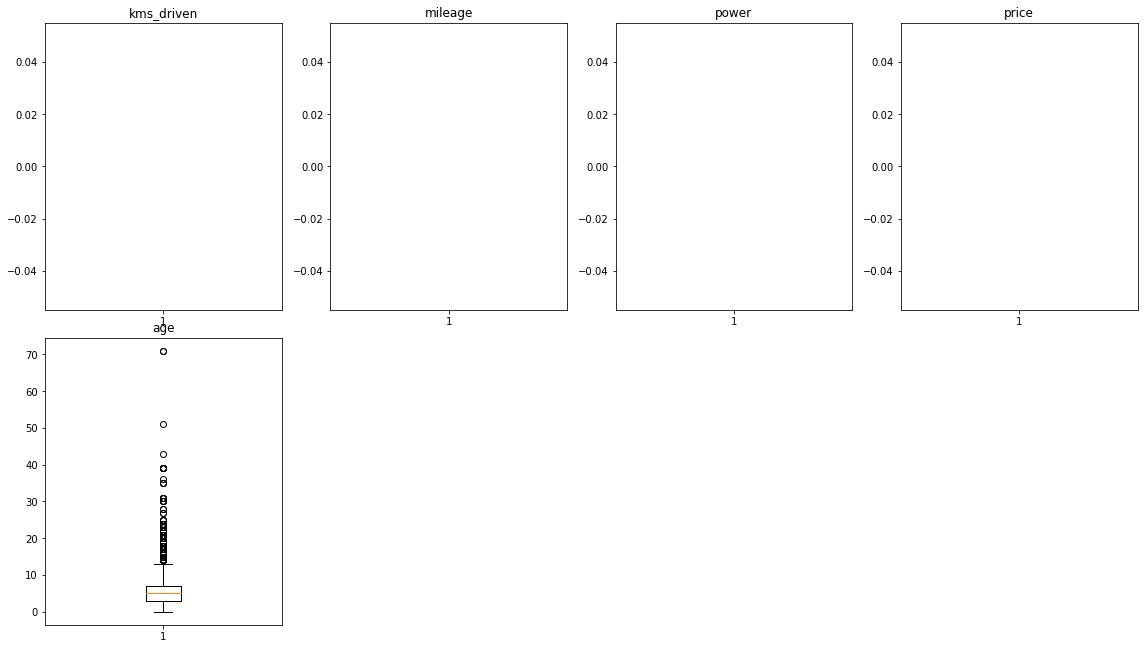

In [212]:
def box_plot(df):
    numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
    # outlier detection using boxplot
    plt.figure(figsize=(16,22))

    for i, variable in enumerate(numeric_columns):
        plt.subplot(5,4,i+1)
        plt.boxplot(df[variable],whis=1.5)
        plt.tight_layout()
        plt.title(variable)

    plt.show()

box_plot(df)

## kms_driven

In [213]:
max_val = df['kms_driven'].quantile(.99)

min_val = df['kms_driven'].quantile(.1)

df = df[(df['kms_driven'] <= max_val) & (df['kms_driven'] > min_val)]

In [214]:
df.shape

(5223, 9)

<AxesSubplot:>

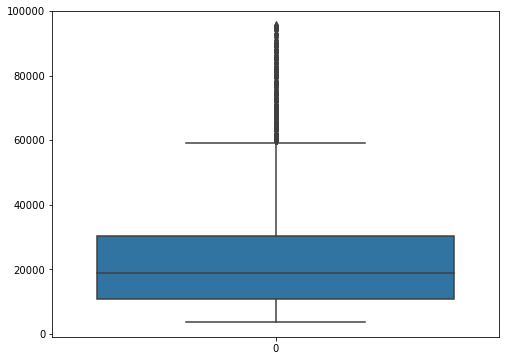

In [215]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df['kms_driven'])

## Mileage

In [216]:
# max_val = df['mileage'].quantile(.99)

# min_val = df['mileage'].quantile(.1)

# df = df[(df['mileage'] <= max_val) & (df['mileage'] > min_val)]

<AxesSubplot:ylabel='mileage'>

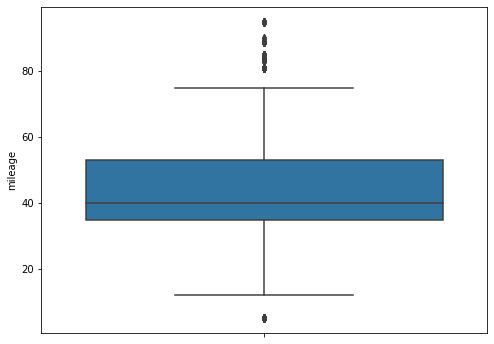

In [217]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['mileage'])

## Power

In [218]:
# plt.figure(figsize=(8,6))
# sns.boxplot(y=df['power'])

## Age

<AxesSubplot:ylabel='age'>

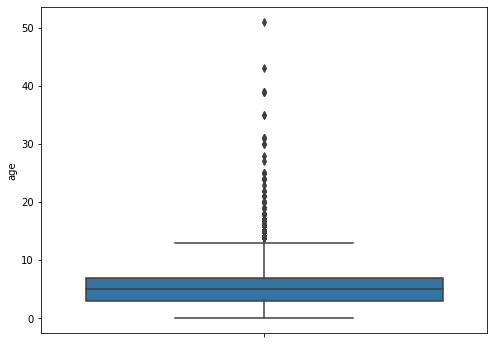

In [219]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

### More than 20 years old bikes are not that much good enough to be bought by anyone,let's take only age upto 20 years.

In [220]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
5589,70000.0,second,other,64.0,NaN,9400.0,Yamaha,125,12
280,8500.0,first,delhi,45.0,13.0,54000.0,Yamaha,150,5
5293,12500.0,second,other,30.0,28.0,170700.0,other,None,6


In [221]:
df = df[df['age'] <= 20]

In [222]:
df.sample(3)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1175,21500.0,first,other,42.0,16.7,90000.0,Yamaha,150,4
6871,10000.0,first,other,NaN,29.6,155000.0,KTM,250,3
443,14062.0,first,mumbai,63.0,14.0,69000.0,Suzuki,150,4


<AxesSubplot:ylabel='age'>

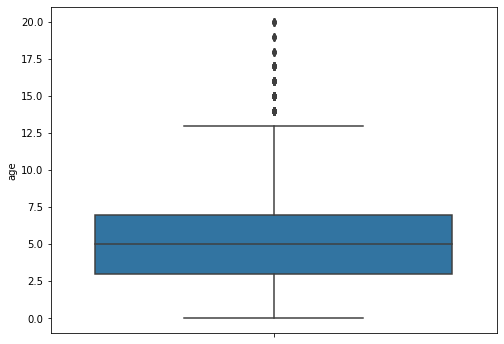

In [223]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['age'])

## Price

In [224]:
max_val = df['price'].quantile(.99)

min_val = df['price'].quantile(.1)

# df = df[(df['price'] <= max_val) & (df['price'] > min_val)]

In [225]:
df[~(df['price'] <= max_val) & (df['price'] > min_val)]

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1251,10500.0,first,delhi,15.00,139.00,760000.0,other,None,2
1870,30000.0,first,pune,20.00,111.00,750000.0,other,None,4
2141,22000.0,first,delhi,13.00,127.00,925000.0,Suzuki,None,7
2254,43000.0,first,other,18.00,65.00,850000.0,Harley-Davidson,None,4
2365,16000.0,first,other,12.00,93.00,1025000.0,other,None,6
2392,6000.0,first,other,12.00,159.70,1200000.0,other,None,4
2442,4600.0,first,other,NaN,NaN,1300000.0,Harley-Davidson,1750,2
2680,24000.0,first,bangalore,19.00,135.00,1299000.0,other,None,6
2810,17000.0,first,mumbai,20.00,111.00,880837.0,other,None,3
2813,6000.0,first,mumbai,25.00,123.30,881875.0,other,None,2


<AxesSubplot:ylabel='price'>

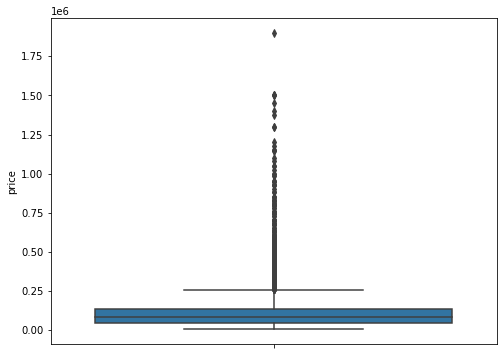

In [226]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df['price'])

In [227]:
df.sample(5)

,kms_driven,owner,location,mileage,power,price,brand,engine,age
1185,13800.0,first,delhi,75.0,9.0,55000.0,Hero,125,2
91,25000.0,first,other,22.0,33.0,95000.0,TVS,None,2
6166,7000.0,first,other,35.0,19.8,145000.0,Royal Enfield,350,3
6333,9700.0,second,other,25.0,27.2,95000.0,Royal Enfield,500,8
5611,20000.0,first,bangalore,85.0,8.2,49999.0,TVS,110,3


In [228]:
# fill price with mean
df.price.fillna(df.price.mean(),inplace=True)

In [229]:
df.isnull().sum()

kms_driven       0
owner            0
location         0
mileage        661
power          350
price            0
brand            0
engine        1175
age              0
dtype: int64

In [230]:
df.shape

(5191, 9)

## Save

In [231]:
## Save the processed data
df.to_csv('../data/processed/processed.csv',index=False)